In [74]:
import matplotlib.pyplot as plt
import numpy as np  # Für die Erzeugung von Jitter auf der x-Achse

def create_boxplot(data, title="Title", y_label="y-values"):

    fig, ax = plt.subplots(figsize=(10, 6))
    
    fig.patch.set_facecolor('#FFFBE9')

    bplot = ax.boxplot(
        data,
        patch_artist=True,
        medianprops=dict(color='#F07B3F', linewidth=2)
    )
    ax.set_title(title, fontweight='bold')
    ax.set_ylabel('Werte')
    # Rahmenlinien entfernen:
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.set_xticks([])  # Entfernt die x-Achsen-Ticks und damit die "1"
    ax.grid(
        True,
        linestyle="--",
        alpha=0.7,
        axis="y"
    )
    
    
    # Farbe hinzufügen:
    ax.set_facecolor('#FFFBE9')
    colors = ['#3282B8', 'orange', 'tomato']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
    # Datenpunkte über dem Boxplot anzeigen
    # Jitter (lecihte Verschiebung) auf der x-Achse hinzufügen, um Überlagerungen zu vermeiden
    x_positions = np.random.normal(1, 0.04, size=len(data))
    ax.scatter(
        x_positions,
        data,
        alpha=0.6,
        color='#FF2E63',
        zorder=3
    )
    
    # Medianwert mit NumPy berechnen
    median_value = np.median(data)

    # Position der Medianlinie ermitteln
    median_line = bplot['medians'][0]
    x_median = median_line.get_xdata()
    y_median = median_line.get_ydata()

    # Text neben der Medianlinie hinzufügen
    ax.text(
        x_median[1] + 0.05,  # leicht rechts von der Medianlinie
        y_median[1],
        f'Median: {median_value}',
        verticalalignment='center',
        fontsize=12,
        color='#F07B3F',
        fontweight='bold'
    )
    
    # Maximum und Minimum mit NumPy berechnen
    max_value = np.max(data)
    min_value = np.min(data)
    # Positionen der Kappen (Caps) ermitteln
    caps = bplot['caps']
        # Untere Kappe (Minimum)
    cap_lower = caps[0]
    x_min = cap_lower.get_xdata()
    y_min = cap_lower.get_ydata()

    # Text neben der unteren Kappe hinzufügen
    ax.text(
        x_min[1] + 0.05,  # leicht rechts von der Kappe
        y_min[1],
        f'Min: {min_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )

    # Obere Kappe (Maximum)
    cap_upper = caps[1]
    x_max = cap_upper.get_xdata()
    y_max = cap_upper.get_ydata()

    # Text neben der oberen Kappe hinzufügen
    ax.text(
        x_max[1] + 0.05,  # leicht rechts von der Kappe
        y_max[1],
        f'Max: {max_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )
    
    # Quartile mit NumPy berechnen
    q1_value = np.percentile(data, 25)
    q3_value = np.percentile(data, 75)
    x_pos = 1
    
    ax.text(
        x_pos + 0.09,
        q1_value,
        f'1. Quartil: {q1_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )
    ax.text(
        x_pos + 0.09,
        q3_value,
        f'3. Quartil: {q3_value:.3f}',
        verticalalignment='center',
        fontsize=12,
        color='#3282B8',
        fontweight='bold'
    )

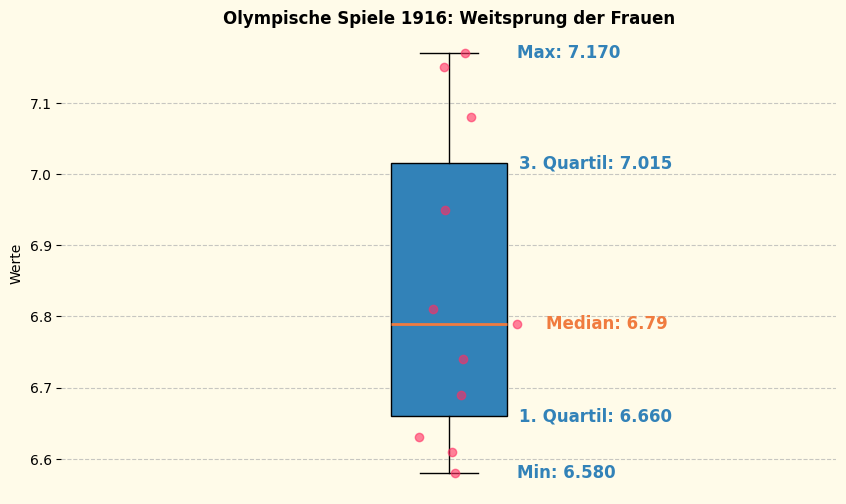

In [75]:
data = [6.58, 6.61, 6.63, 6.69, 6.74, 6.79, 6.81, 6.95, 7.08, 7.15, 7.17]
create_boxplot(data=data, title="Olympische Spiele 1916: Weitsprung der Frauen")